# ClassPass Pilates Exploratory Data Analysis

### Introduction

The DataFrame contains information about available Pilates classes from various studios across London, scraped from the ClassPass website. There are approximately 323 studios offering a range of activities, in addition to Pilates.

The objective is to identify the highest-rated studio (with a 5/5 rating) that offers Pilates classes, based on a large number of reviews. Once the top-rated studio is found, the goal is to explore the other types of classes they offer, determine which activities are the most popular, and then select a second activity to integrate into my routine at the top-rated studio that offers both.

The analysis will be divided into several parts:

1. Data Importing

2. Data Cleaning

3. Sorting

4. Basic statistics

5. EDA

### Step 1: Imports

In [1]:
import pandas as pd # Data manipulation
import numpy as np # Algebra operations

import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns


# Load the dataset
file_path = 'data/class_pass.csv'
df = pd.read_csv(file_path)

pd.set_option("display.precision", 2)

df.head()

,tags,pilates,name,location,avg_rating,num_ratings
0,"['pilates', ' strength training', ' …']",True,BLOK,"Hearn St, London",4.8,(30000+)
1,"['yoga', ' strength training', ' …']",False,Mission E1,"7-9 Fashion Street, London",4.9,(20000+)
2,"['strength training', ' pilates', ' …']",True,BLOK,"The Tram Depot, 38-40 Upper Clapton Rd, London",4.8,(30000+)
3,"['cycling', ' yoga', ' …']",False,3Tribes - Crouch End,"71 Crouch End Hill, London",4.9,(30000+)
4,"['strength training', ' boxing', ' …']",False,1Rebel,"9 Holles Street, London",4.8,(30000+)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tags         323 non-null    object 
 1   pilates      323 non-null    bool   
 2   name         323 non-null    object 
 3   location     323 non-null    object 
 4   avg_rating   323 non-null    float64
 5   num_ratings  323 non-null    object 
dtypes: bool(1), float64(1), object(4)
memory usage: 13.1+ KB


In [3]:
print(df.shape)

(323, 6)


1 feature is logical (bool), 4 features are object and 1 feature is numeric. There are no missing values because each column contains 323 observations, the same number of rows as seen with .shape

In [4]:
df['pilates'].unique()

array([ True, False])

I will change the column type from bool to integer to better analyse basic stats characteristics of each numerical feature further.

In [5]:
df['pilates'] = df['pilates'].astype("int64")

In [6]:
df.describe()

,pilates,avg_rating
count,323.00,323.00
mean,0.67,4.79
std,0.47,0.12
min,0.00,4.30
25%,0.00,4.70
50%,1.00,4.80
75%,1.00,4.90
max,1.00,5.00


Next I'll have to clean num_ratings column by removing non-numeric characters and converting to number

### Step 2: Cleaning

In [7]:
df['num_ratings'] = (df['num_ratings'].str.replace(r"[^\d]", "", regex=True).astype(int))  

In [8]:
df.describe()

,pilates,avg_rating,num_ratings
count,323.00,323.00,323.00
mean,0.67,4.79,8891.61
std,0.47,0.12,10951.75
min,0.00,4.30,13.00
25%,0.00,4.70,500.00
50%,1.00,4.80,2500.00
75%,1.00,4.90,16250.00
max,1.00,5.00,30000.00


#### Determining outliers

For num_ratings column the std is higher than the mean which could mean the values are wide spread and there are outliers. 

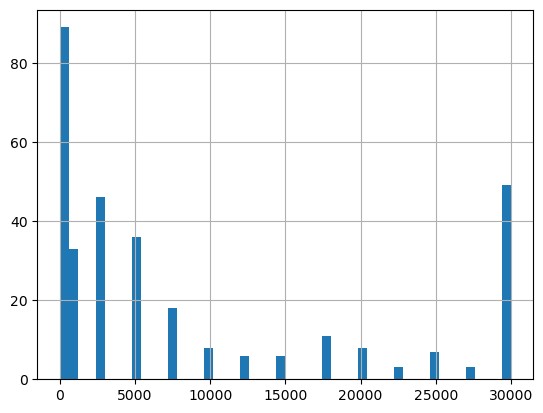

In [126]:
df['num_ratings'].hist(bins=50)
plt.show()

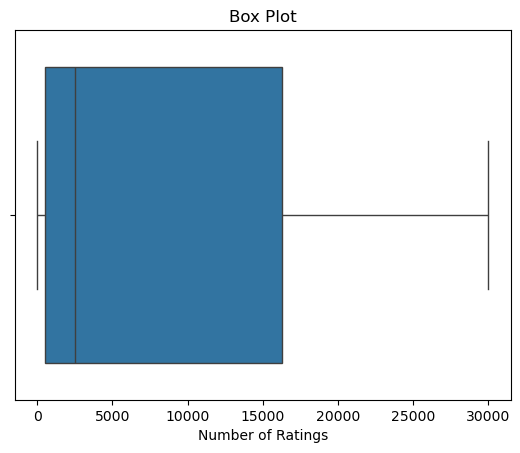

In [10]:
sns.boxplot(x=df['num_ratings'])
plt.title("Box Plot")
plt.xlabel("Number of Ratings")
plt.show()

#### Observations

There are some studios that have very few ratings, close to 0, that are creating outliers.

### Step 3: Sorting

In [11]:
df.sort_values(by="num_ratings", ascending=True).head()

,tags,pilates,name,location,avg_rating,num_ratings
314,['pilates'],1,Elite Reformer Pilates,"16-17 Cockfosters Parade, Barnet",5.0,13
309,"['pilates', ' yoga', ' …']",1,Truform Studio,"248 High Street, Beckenham",4.8,19
315,"['yoga', ' dance', ' …']",0,Dance With Me @The Hamptons,"Hamptons Estate, Worcester Park, London",4.8,21
319,"['dance', ' pilates', ' …']",1,The Cherish Club,"Bridgeman Street, Westminster, London",4.9,23
320,"['strength training', ' gym time', ' …']",0,The Edge Training,"Willows Activity Farm, Coursers Road, St. Albans",4.9,27


In [12]:
df.sort_values(by=["num_ratings", "avg_rating"], ascending=[True, False]).head()

,tags,pilates,name,location,avg_rating,num_ratings
314,['pilates'],1,Elite Reformer Pilates,"16-17 Cockfosters Parade, Barnet",5.0,13
309,"['pilates', ' yoga', ' …']",1,Truform Studio,"248 High Street, Beckenham",4.8,19
315,"['yoga', ' dance', ' …']",0,Dance With Me @The Hamptons,"Hamptons Estate, Worcester Park, London",4.8,21
319,"['dance', ' pilates', ' …']",1,The Cherish Club,"Bridgeman Street, Westminster, London",4.9,23
317,"['gym time', ' strength training', ' …']",0,THE REP ROOM,UNIT 2 Stockbridge CI Hammond Street Cheshunt ...,4.9,27


In [13]:
df.sort_values(by="avg_rating", ascending=False).head()

,tags,pilates,name,location,avg_rating,num_ratings
208,"['strength training', ' pilates', ' …']",1,Body By Ciara,"58a Hillfield Park Mews, London",5.0,100
273,['pilates'],1,LifeBody,"78 Church Road, London",5.0,100
288,"['strength training', ' barre', ' …']",0,Pilates and Tara,"136 Hither Green Lane, London",5.0,100
298,['pilates'],1,Everybody Reformer,"289 Lower Addiscombe Road, Croydon",5.0,44
210,"['strength training', ' pilates', ' …']",1,Bourne Fitness,"Grange Mills Weir Road, Unit 6, London",5.0,100


Although some studios have exceptionally high ratings, their reliability may be questionable if they are based on a small number of reviews (13-20). Such ratings might be inflated due to factors like politeness from first-time visitors or self-promotion by the staff to gain credibility, but a 5/5 rating coming from few people who may not have returned, doesn't compare to a 5/5 rating from 100+ consistent or returning reviewers, which is more accurate and trustwhorty.

In [14]:
df.describe(include=['object'])

,tags,name,location
count,323,323,323
unique,58,230,322
top,"['yoga', ' pilates', ' …']",MoreYoga,"90 Upper Street, London"
freq,53,25,2


In [15]:
df['tags'].value_counts()

tags
['yoga', ' pilates', ' …']                             53
['pilates']                                            49
['gym time', ' strength training', ' …']               32
['yoga', ' pilates']                                   20
['strength training', ' pilates', ' …']                13
['pilates', ' strength training', ' …']                11
['pilates', ' strength training']                      10
['pilates', ' yoga', ' …']                              9
['strength training', ' cycling', ' …']                 9
['strength training', ' yoga', ' …']                    8
['barre', ' pilates']                                   7
['yoga', ' strength training', ' …']                    7
['yoga', ' barre', ' …']                                6
['barre', ' pilates', ' …']                             6
['pilates', ' barre', ' …']                             6
['pilates', ' prenatal', ' …']                          5
['pilates', ' yoga']                                    5
['strengt

#### Saving cleaned DataFrame

In [16]:
cleaned_file_path = 'data/class_pass_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)

### Step 4: EDA

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tags         323 non-null    object 
 1   pilates      323 non-null    int64  
 2   name         323 non-null    object 
 3   location     323 non-null    object 
 4   avg_rating   323 non-null    float64
 5   num_ratings  323 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 15.3+ KB


In [18]:
df['pilates'].value_counts()

pilates
1    218
0    105
Name: count, dtype: int64

218 studios out of 323 offer pilates classes.

In [19]:
df['pilates'].value_counts(normalize=True)

pilates
1    0.67
0    0.33
Name: proportion, dtype: float64

In [20]:
df['name'].value_counts()

name
MoreYoga                                  25
Fitness First                             13
Barrecore                                  9
1Rebel                                     8
Gymbox                                     8
                                          ..
The Factory Fitness & Dance Centre LTD     1
Training Points Fitness and Therapy        1
Hot Yoga Essex                             1
Snap Fitness                               1
Frame                                      1
Name: count, Length: 230, dtype: int64

In [21]:
df['location'].value_counts()

location
90 Upper Street, London                       2
Hearn St, London                              1
Westfield Shopping Centre, London             1
107 Station Road, West Wickham                1
96A Clifton Hill, London                      1
                                             ..
2 Clove Crescent, London                      1
55 Baker St, London                           1
Lyham Road, London                            1
Wimbledon Village, 1 Thornton Road, London    1
29 New Inn Yard, London                       1
Name: count, Length: 322, dtype: int64

Indexing and Retrieving data

#### What is the proportion of available pilates classses today?

In [22]:
df["pilates"].mean()

0.6749226006191951

Boolean indexing -> DataFrame consisting only rows that satisfy a condition on  certain value

#### What is the average rating of studios that offer pilates classes?

In [23]:
df[df["pilates"] == 1]["avg_rating"].mean()

4.812385321100917

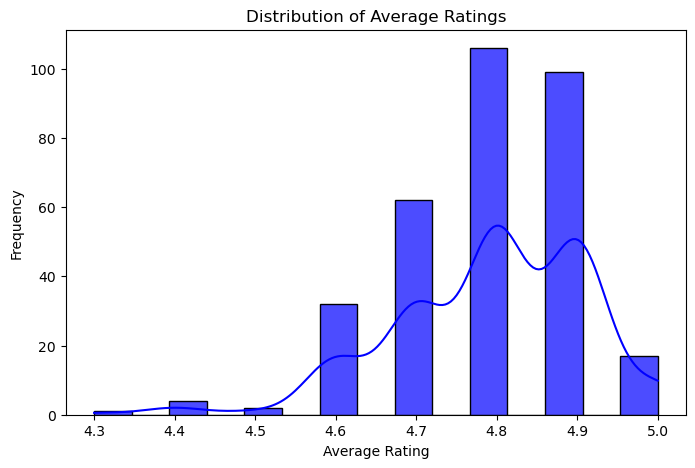

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df['avg_rating'], kde=True, bins=15, color="blue", alpha=0.7)
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()

#### What is the distribution of average ratings for pilates vs. non-pilates studios?

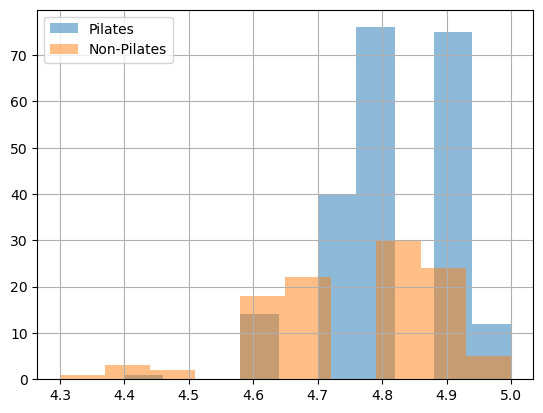

In [25]:
import matplotlib.pyplot as plt
df[df["pilates"] == 1]["avg_rating"].hist(alpha=0.5, label="Pilates")
df[df["pilates"] == 0]["avg_rating"].hist(alpha=0.5, label="Non-Pilates")
plt.legend()
plt.show()

#### What proportion of pilates studios have a rating above a 4.5 threshold?

In [26]:
threshold = 4.5
df[(df["pilates"] == 1) & (df["avg_rating"] > threshold)].shape[0] / df[df["pilates"] == 1].shape[0]

0.9954128440366973

#### What is the highest-rated studio offering pilates classes?

In [27]:
df[df["pilates"] == 1]["avg_rating"].max()

5.0

In [28]:
df[df["avg_rating"] == df[df["pilates"] == 1]["avg_rating"].max()] 

,tags,pilates,name,location,avg_rating,num_ratings
153,"['pilates', ' strength training']",1,Trent Park Pilates,"Bramley Rd,Trent Park Equestrian Centre, London",5.0,1000
208,"['strength training', ' pilates', ' …']",1,Body By Ciara,"58a Hillfield Park Mews, London",5.0,100
210,"['strength training', ' pilates', ' …']",1,Bourne Fitness,"Grange Mills Weir Road, Unit 6, London",5.0,100
221,"['pilates', ' boxing']",1,Posture London,"107 Station Road, West Wickham",5.0,100
226,"['strength training', ' boxing', ' …']",0,Lifelab,"Foxbury Avenue, Chislehurst BR7 6SD, UK, Chisl...",5.0,100
228,"['strength training', ' boxing', ' …']",0,FitBirds,"7 Ledrington Rd, London",5.0,500
245,"['strength training', ' personal training', ' …']",0,Built London,"Unit 113, Anerley Works, 183a Anerley Rd, London",5.0,500
250,"['strength training', ' pilates', ' …']",1,F.I.T.T STUDIO,"26 Aylmer Parade, London",5.0,100
261,['pilates'],1,Better Flow,"Hackney Road, London",5.0,500
268,['pilates'],1,Vivo Pilates,"Unit 208 Harbour Yard, Chelsea Harbour, London",5.0,100


#### Observations

Seems that Trent Park Pilates is the most loved studio for Pilestes classes with 5/5 rating coming from a large number of reviews. However, my analysis is too limited and niched on pilates while these studios seem to offer a large variety of other type of classes I could look at. Therefore, I will parse the tags column and create new binary columns for activity types in order to compare them with my favorite sport activity (pilates) and see how I could combine different classes at the top-rated studio.

In [29]:
# Extract all unique tags from the 'tags' column
import ast
#  df['tags'] = df['tags'].str.strip("[]").str.replace("'", "").str.split(", ")
df['tags'] = df['tags'].apply(ast.literal_eval).apply(lambda x: [v.strip() for v in x if v != ' …'])

# Extract unique tags and create a set
all_tags = set(tag for tags_list in df['tags'] for tag in tags_list)

# Create a new column for each tag with True/False values, skipping 'pilates'
for tag in all_tags:
    if tag == 'pilates':
        continue  # Skip the 'pilates' tag
    else:
        # Ensure the 'pilates' column is not affected
        if tag not in df.columns:
            # Apply the logic only for rows with non-empty 'tags' lists
            df[tag.strip()] = df['tags'].apply(lambda tags: tag in tags if isinstance(tags, list) else False)


df.head()

,tags,pilates,name,location,avg_rating,num_ratings,meditation,cycling,outdoors,personal training,...,low-impact training,strength training,prenatal,running,gym time,swimming,barre,aerial,stretching,yoga
0,"[pilates, strength training]",1,BLOK,"Hearn St, London",4.8,30000,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,"[yoga, strength training]",0,Mission E1,"7-9 Fashion Street, London",4.9,20000,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,"[strength training, pilates]",1,BLOK,"The Tram Depot, 38-40 Upper Clapton Rd, London",4.8,30000,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,"[cycling, yoga]",0,3Tribes - Crouch End,"71 Crouch End Hill, London",4.9,30000,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,"[strength training, boxing]",0,1Rebel,"9 Holles Street, London",4.8,30000,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


### Strategy for handling preserving the Pilates columns while extracting other activity types

The ast.literal_eval function evaluates a string containing a Python literal (list, dictionary, tuple) into its corresponding Python object.

Since df['tags'] was containing entries like "[ 'yoga', ' strength training', ' …']", ast.literal_eval converted these strings into actual Python lists, like ['yoga', 'strength training', '…'], instead of strings.

The lambda applies a second transformation to each list (x) in df['tags'] by removing any whitespace from the strings and avoid extracting the ' …' element

In [30]:
all_tags

{'aerial',
 'barre',
 'boxing',
 'cycling',
 'dance',
 'gym time',
 'low-impact training',
 'meditation',
 'outdoors',
 'personal training',
 'pilates',
 'prenatal',
 'rowing',
 'running',
 'sports recovery',
 'strength training',
 'stretching',
 'swimming',
 'yoga'}

In [31]:
print(df.columns)

Index(['tags', 'pilates', 'name', 'location', 'avg_rating', 'num_ratings',
       'meditation', 'cycling', 'outdoors', 'personal training', 'rowing',
       'boxing', 'dance', 'sports recovery', 'low-impact training',
       'strength training', 'prenatal', 'running', 'gym time', 'swimming',
       'barre', 'aerial', 'stretching', 'yoga'],
      dtype='object')


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tags                 323 non-null    object 
 1   pilates              323 non-null    int64  
 2   name                 323 non-null    object 
 3   location             323 non-null    object 
 4   avg_rating           323 non-null    float64
 5   num_ratings          323 non-null    int64  
 6   meditation           323 non-null    bool   
 7   cycling              323 non-null    bool   
 8   outdoors             323 non-null    bool   
 9   personal training    323 non-null    bool   
 10  rowing               323 non-null    bool   
 11  boxing               323 non-null    bool   
 12  dance                323 non-null    bool   
 13  sports recovery      323 non-null    bool   
 14  low-impact training  323 non-null    bool   
 15  strength training    323 non-null    boo

Validating that values were correctly extracted as [TRUE, FALSE]

In [35]:
print(df['pilates'].unique())
print(df['strength training'].unique())

[1 0]
[1 0]


The rest of the tags were safely extracted and transformed into boolean features without affecting the 'pilates' column. Now I can continue by converting them into integers in order to include them further in my analysis.

In [34]:
df['meditation'] = df['meditation'].astype("int64")
df['cycling'] = df['cycling'].astype("int64")
df['outdoors'] = df['outdoors'].astype("int64")
df['personal training'] = df['personal training'].astype("int64")
df['rowing'] = df['rowing'].astype("int64")
df['boxing'] = df['boxing'].astype("int64")
df['dance'] = df['dance'].astype("int64")
df['sports recovery'] = df['sports recovery'].astype("int64")
df['low-impact training'] = df['low-impact training'].astype("int64")
df['strength training'] = df['strength training'].astype("int64")
df['prenatal'] = df['prenatal'].astype("int64")
df['running'] = df['running'].astype("int64")
df['gym time'] = df['gym time'].astype("int64")
df['swimming'] = df['swimming'].astype("int64")
df['barre'] = df['barre'].astype("int64")
df['aerial'] = df['aerial'].astype("int64")
df['stretching'] = df['stretching'].astype("int64")
df['yoga'] = df['yoga'].astype("int64")

In [36]:
df.head()

,tags,pilates,name,location,avg_rating,num_ratings,meditation,cycling,outdoors,personal training,...,low-impact training,strength training,prenatal,running,gym time,swimming,barre,aerial,stretching,yoga
0,"[pilates, strength training]",1,BLOK,"Hearn St, London",4.8,30000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,"[yoga, strength training]",0,Mission E1,"7-9 Fashion Street, London",4.9,20000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,"[strength training, pilates]",1,BLOK,"The Tram Depot, 38-40 Upper Clapton Rd, London",4.8,30000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,"[cycling, yoga]",0,3Tribes - Crouch End,"71 Crouch End Hill, London",4.9,30000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,"[strength training, boxing]",0,1Rebel,"9 Holles Street, London",4.8,30000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
df.describe()

,pilates,avg_rating,num_ratings,meditation,cycling,outdoors,personal training,rowing,boxing,dance,...,low-impact training,strength training,prenatal,running,gym time,swimming,barre,aerial,stretching,yoga
count,323.00,323.00,323.00,323.00,323.00,3.23e+02,3.23e+02,3.23e+02,323.00,323.00,...,323.00,323.00,323.00,3.23e+02,323.00,323.00,323.0,3.23e+02,323.00,323.00
mean,0.67,4.79,8891.61,0.01,0.05,6.19e-03,9.29e-03,3.10e-03,0.02,0.03,...,0.02,0.35,0.03,3.10e-03,0.12,0.02,0.1,9.29e-03,0.02,0.37
std,0.47,0.12,10951.75,0.11,0.21,7.86e-02,9.61e-02,5.56e-02,0.14,0.18,...,0.12,0.48,0.16,5.56e-02,0.33,0.14,0.3,9.61e-02,0.15,0.48
min,0.00,4.30,13.00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,...,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.0,0.00e+00,0.00,0.00
25%,0.00,4.70,500.00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,...,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.0,0.00e+00,0.00,0.00
50%,1.00,4.80,2500.00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,...,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.0,0.00e+00,0.00,0.00
75%,1.00,4.90,16250.00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,...,0.00,1.00,0.00,0.00e+00,0.00,0.00,0.0,0.00e+00,0.00,1.00
max,1.00,5.00,30000.00,1.00,1.00,1.00e+00,1.00e+00,1.00e+00,1.00,1.00,...,1.00,1.00,1.00,1.00e+00,1.00,1.00,1.0,1.00e+00,1.00,1.00


Now I can continue by analysing which sports activity is most popular among ClassPass studios in London and other activities are high-rated in order to further integrate them in my routine.

In [80]:
activity_columns = pd.concat([df.iloc[:, 1:2], df.iloc[:, 6:]], axis=1)

activity_counts = activity_columns.sum().sort_values(ascending=False)

print(activity_counts)

pilates                218
yoga                   121
strength training      112
gym time                40
barre                   32
cycling                 15
dance                   11
prenatal                 9
stretching               7
boxing                   6
swimming                 6
low-impact training      5
meditation               4
personal training        3
aerial                   3
outdoors                 2
sports recovery          1
running                  1
rowing                   1
dtype: int64


/var/folders/4z/5jqzylvs3lng08w4zk1s9jc80000gn/T/ipykernel_97727/35401435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_counts.index, y=activity_counts.values, palette='viridis')


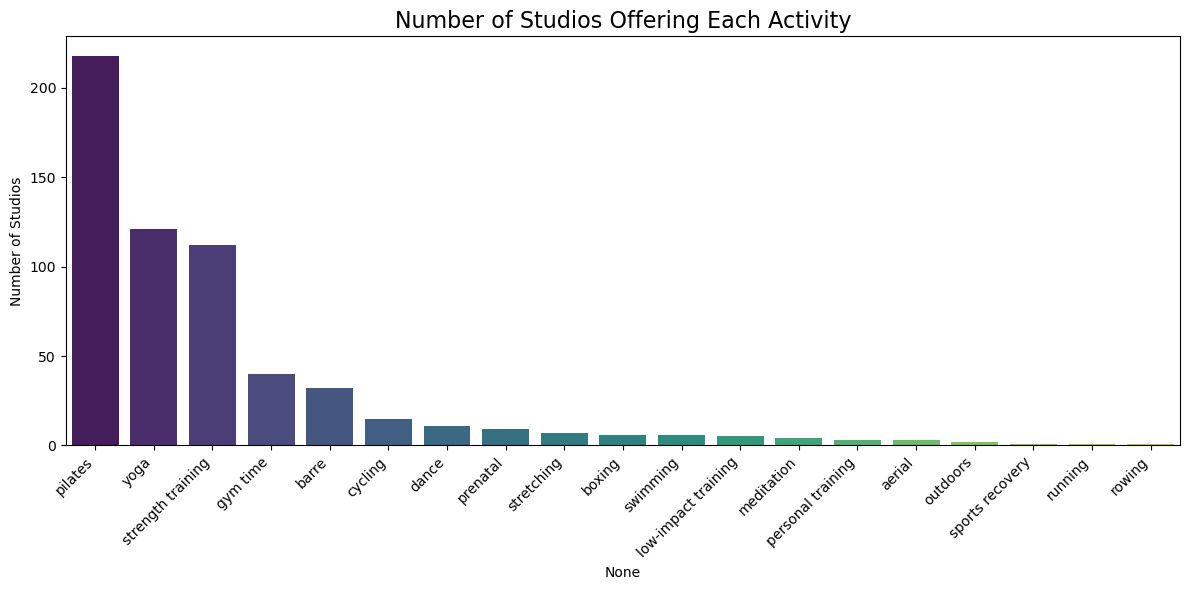

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette='viridis')
plt.title("Number of Studios Offering Each Activity", fontsize=16)
plt.ylabel("Number of Studios")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

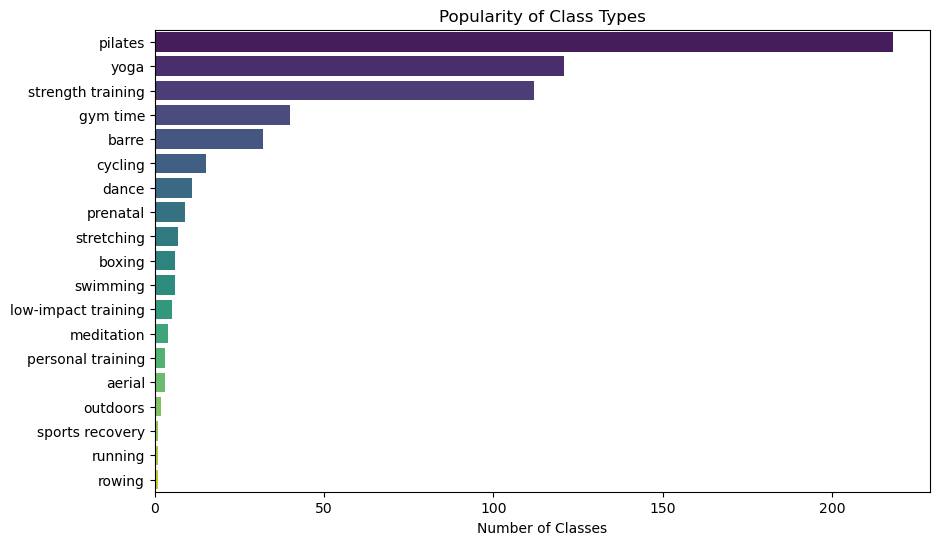

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x=activity_counts.values, y=activity_counts.index, palette="viridis", hue=activity_counts.index)
plt.title("Popularity of Class Types")
plt.xlabel("Number of Classes")
plt.ylabel("")
plt.show()

#### How many studios offer each type of activity?

/var/folders/4z/5jqzylvs3lng08w4zk1s9jc80000gn/T/ipykernel_97727/1129196284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_counts.index, y=activity_counts.values, palette='viridis')


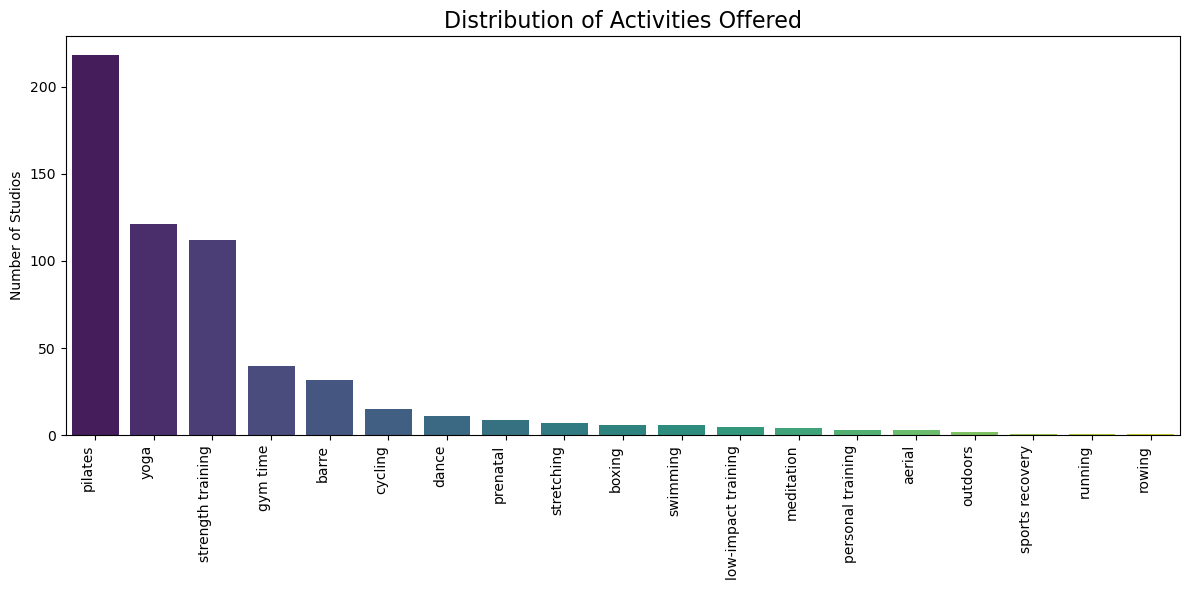

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette='viridis')
plt.title("Distribution of Activities Offered", fontsize=16)
plt.xlabel("")
plt.ylabel("Number of Studios")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

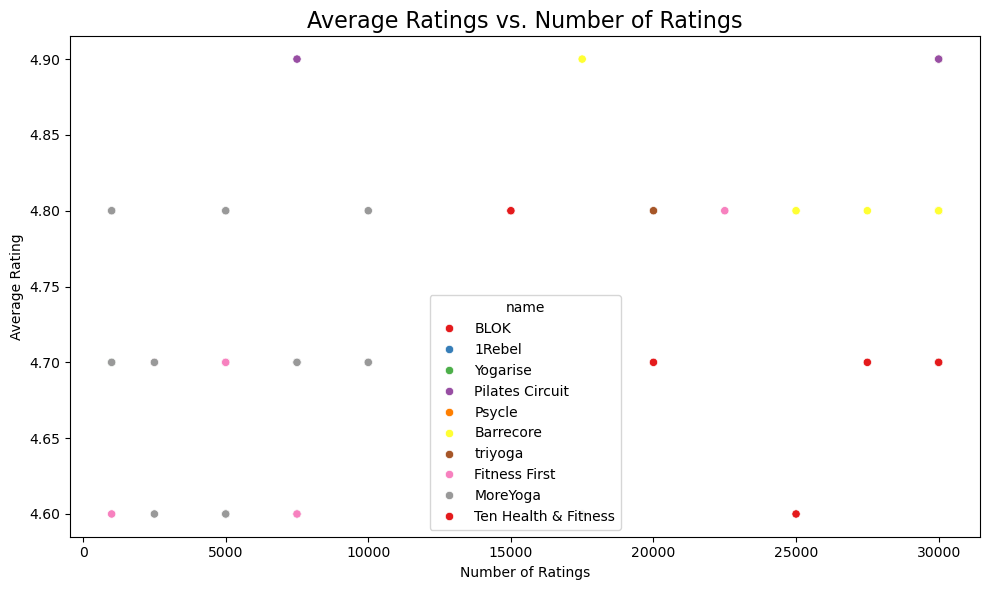

In [113]:
top_10_studios = df.groupby('name')['num_ratings'].sum().nlargest(10).index

# Filter the DataFrame to include only the top 10 studios
filtered_df = df[df['name'].isin(top_10_studios)]

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_df['num_ratings'], y=filtered_df['avg_rating'], hue=filtered_df['name'], legend=True, palette='Set1')
plt.title("Average Ratings vs. Number of Ratings", fontsize=16)
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

In [49]:
df['strength training'].value_counts()

strength training
0    211
1    112
Name: count, dtype: int64

In [45]:
df['pilates'].value_counts()

pilates
1    218
0    105
Name: count, dtype: int64

#### How many studios in London offer both pilates and strength training?

In [50]:
# Filter studios offering both Pilates and strength training
filtered_studios = df[(df["pilates"] == 1) & (df["strength training"] == 1)]

# Get the number of such studios
num_studios = filtered_studios.shape[1]
print(num_studios)
print(filtered_studios[['name']])

24
                                    name
0                                   BLOK
2                                   BLOK
5                                 1Rebel
6                            Victus Soul
7                                 1Rebel
8                                 1Rebel
9                                 1Rebel
11                            Train Yard
12                                1Rebel
14                                1Rebel
22   Training Points Fitness and Therapy
36                      Tempo 301 | SE17
42                            Studio Fix
72                          Guts & Glory
88                       Element Fitness
116                     Sopers House LTD
120                      Core Kensington
140                            High Vibe
153                   Trent Park Pilates
180                    Guardians Studios
187                               Oncore
198                                  FS8
201                    The Shredquarters
207          

#### Which one of the these has the highest rating?

In [52]:
# Find the studio with the highest rating
highest_rated_studio = filtered_studios.loc[filtered_studios["avg_rating"].idxmax()]
print(highest_rated_studio)

tags                                      [pilates, strength training]
pilates                                                              1
name                                                Trent Park Pilates
location               Bramley Rd,Trent Park Equestrian Centre, London
avg_rating                                                         5.0
num_ratings                                                       1000
meditation                                                           0
cycling                                                              0
outdoors                                                             0
personal training                                                    0
rowing                                                               0
boxing                                                               0
dance                                                                0
sports recovery                                                      0
low-im

In [78]:
# Get the only the relevant details of the studio
best_studio = filtered_studios.loc[filtered_studios["avg_rating"].idxmax(), ["name", "avg_rating", "num_ratings", "location"]]
print(best_studio)


name                                        Trent Park Pilates
avg_rating                                                 5.0
num_ratings                                               1000
location       Bramley Rd,Trent Park Equestrian Centre, London
Name: 153, dtype: object


In [60]:
final_file_path = 'data/class_pass_final.csv'
df.to_csv(final_file_path, index=False)

In [112]:
pd.crosstab(df["pilates"] == 1, df["avg_rating"], margins=True)


avg_rating,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,All
pilates,,,,,,,,,
False,1,3,2,18,22,30,24,5,105
True,0,1,0,14,40,76,75,12,218
All,1,4,2,32,62,106,99,17,323


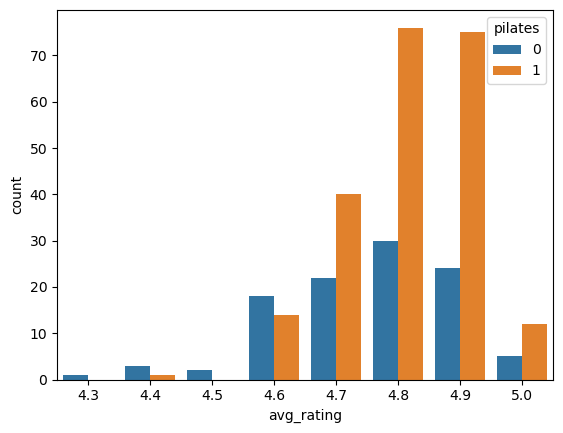

In [111]:
sns.countplot(x="avg_rating", hue="pilates", data=df);
